# Predicting Employment Rates: A Regression Analysis

### Introduction
This project aims to analyze and predict the impact of various economic and technological indicators on employment rates in the United States. By integrating diverse datasets, we explore how factors such as daily interest rates, advancements in AI technology (through patent data), consumer debt levels, PCE inflation, business application rates, and stock market performance (specifically QQQ index close prices) correlate with employment trends.

Using Hadoop, we've streamlined our data processing pipeline to map and reduce our collected datasets to a uniform monthly granularity. This approach allows for a more consistent analysis over time, ensuring that each variable's influence is accurately captured and interpreted in our predictive models.

The following sections of this notebook will detail the data preprocessing steps, the regression model's implementation, and the subsequent analysis of our results.

# Importing Necessary Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Loading Data

Loading all the data and converting the date coloumn of each data to same format

#### Loading Employment rate data

* Data Overview: This dataset includes the monthly employment rates, which are
crucial indicators of economic health and labor market dynamics. Given that this data was already in a monthly format, no additional reduction was necessary for temporal alignment with other datasets.

* Data Storage and Handling: Despite the employment rate data already being in the appropriate monthly format, we still stored it in HDFS to maintain consistency in data management and to leverage Hadoop's robust data handling and processing capabilities. Storing this data in HDFS allows for efficient access and manipulation alongside other datasets, facilitating integrated analysis within our Hadoop ecosystem.

* [Link to Data](https://fred.stlouisfed.org/series/LREM74TTUSM156S )



In [3]:
# Specify the file path
file_path = '/content/drive/MyDrive/Big Data Analytics/Employment_rate_reduced.txt'

# Create DataFrame
er_df = pd.read_csv(file_path, sep="\t", header=None, names=["Date", "emp_rate"])

# Convert date column to date-time format
er_df['Date'] = pd.to_datetime(er_df['Date'], format='%m/%d/%Y')

# Display the first few rows to verify the conversion
er_df.head()

,Date,emp_rate
0,1981-01-01,62.303828
1,1982-01-01,61.420397
2,1983-01-01,60.431183
3,1984-01-01,62.136820
4,1985-01-01,63.313602


#### Loading AI Patent Data - GOOGLE



*   Data Overview: This dataset comprises the number of AI-related patents, reflecting the pace of technological advancements. The data has been processed in Hadoop by mapping (key: Date-YYYYMM, Value: 1/0[whether that yearmonth is present or not]) and reducing operations (sum of the count per key), where we aggregated the total patent counts for each month.

* Relevance to Employment Rates: We aim to explore how advancements in AI technology, as indicated by patent filings, influence employment rates. The hypothesis is that increased technological innovation could either augment job creation in tech-driven sectors or lead to job displacement due to automation. This analysis will help us understand the broader economic impacts of AI technology.

*   [Link to Data]( https://console.cloud.google.com/bigquery?ws=!1m4!1m3!3m2!1spatents-public-data!2sgoogle_patents_research)





In [4]:

file_path = '/content/drive/MyDrive/Big Data Analytics/AI_PATENT_Reduced_Data.txt'

# Creating dataframe
ai_df = pd.read_csv(file_path, sep="\t", header=None, names=["Date", "patent_cnt"])

# Convert numeric dates to string
ai_df['Date'] = ai_df['Date'].astype(str)

# Ensuring each date is set to the first of the month in 'YYYY-MM-DD' format
ai_df['Date'] = pd.to_datetime(ai_df['Date'], format='%Y%m').apply(lambda x: x.replace(day=1))

# Display the first few rows to verify the conversion
print(ai_df.head())


        Date  patent_cnt
0 2005-02-01           2
1 2005-03-01           9
2 2005-04-01           1
3 2005-05-01           3
4 2005-06-01           7


#### Loading Consumers Credit Card Debt Data

* Data Overview: This dataset tracks the monthly consumer credit card debt, which serves as a key indicator of consumer spending habits and financial health. Since the data is already provided on a monthly basis, no further reduction was required.

* [Link to Data](https://fred.stlouisfed.org/series/CCLSCBM027SBOG )



In [5]:
# Specify the file path
file_path = '/content/drive/MyDrive/Big Data Analytics/ConsumerDebt_Reduced_Data.txt'

# Create DataFrame
debt_df = pd.read_csv(file_path, sep="\t", header=None, names=["Date", "debt"])

# Convert date column to date-time format
debt_df['Date'] = pd.to_datetime(debt_df['Date'], format='%m/%d/%Y')

# Display the first few rows to verify the conversion
debt_df.head()

,Date,debt
0,2001-01-01,23.0213
1,2002-01-01,26.3062
2,2003-01-01,27.3152
3,2004-01-01,31.3228
4,2005-01-01,34.3049


#### Loading Interest rate data



*   Data Overview: The dataset includes daily interest rates, which are vital for understanding financial market conditions and monetary policy impacts. Given the daily frequency of the data, we performed a reduction by calculating the average interest rate for each month. This aggregation provides a clearer view of monthly interest rate trends.

* [Link to Data](https://fred.stlouisfed.org/series/DFF)





In [6]:
# Specify the file path
file_path = '/content/drive/MyDrive/Big Data Analytics/Interest_rate_Reduced_Data.txt'

# Create DataFrame
ir_df = pd.read_csv(file_path, sep="\t", header=None, names=["Date", "int_rate"])

# Convert numeric dates to string
ir_df['Date'] = ir_df['Date'].astype(str)

# Ensuring each date is set to the first of the month in 'YYYY-MM-DD' format
ir_df['Date'] = pd.to_datetime(ir_df['Date'], format='%Y%m').apply(lambda x: x.replace(day=1))

# Display the first few rows to verify the conversion
ir_df.head()

,Date,int_rate
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


#### Loading PCE inflation data

* Data Overview: This dataset includes monthly PCE (Personal Consumption Expenditures) inflation data, which is a critical indicator of consumer price changes and economic stability. The data is inherently monthly, requiring no further reduction for alignment with other datasets.

* [Link to Data](https://fred.stlouisfed.org/series/PCEPILFE)


In [7]:
# Specify the file path
file_path = '/content/drive/MyDrive/Big Data Analytics/PCEPILFE_Reduced_Data.txt'

# Create DataFrame
pce_df = pd.read_csv(file_path, sep="\t", header=None, names=["Date", "inflation"])

# Convert date column to date-time format
pce_df['Date'] = pd.to_datetime(pce_df['Date'], format='%m/%d/%Y')

# Display the first few rows to verify the conversion
pce_df.head()

,Date,inflation
0,1959-01-01,15.501
1,1960-01-01,15.822
2,1961-01-01,16.032
3,1962-01-01,16.235
4,1963-01-01,16.451


#### Loading Bussinness Applications Dataset

* Data Overview: This dataset tracks the weekly count of new business applications, serving as a significant measure of entrepreneurial activity and economic dynamism. Given the weekly collection frequency, we performed a reduction by aggregating the counts to obtain total monthly filings. This aggregation provides a clearer view of trends in business creation each month.

* [Link to Data](https://fred.stlouisfed.org/series/BUSAPPWNSAUS)




In [8]:
# Specify the file path
file_path = '/content/drive/MyDrive/Big Data Analytics/BUSAPPWNSAUS_Reduced_Data.txt'

# Create DataFrame
bsns_app_df = pd.read_csv(file_path, sep="\t", header=None, names=["Date", "bsns_app_cnt"])

# Convert date column to date-time format
bsns_app_df['Date'] = pd.to_datetime(bsns_app_df['Date'], format='%Y%m').dt.strftime('%Y-%m-01')

# Display the first few rows to verify the conversion
bsns_app_df.head()

,Date,bsns_app_cnt
0,2006-01-01,191710.0
1,2006-02-01,244020.0
2,2006-03-01,239020.0
3,2006-04-01,292990.0
4,2006-05-01,225050.0


#### Loading NASDAQ QQQ Index dataset



*   Data Overview and Impact on Employment Rates: The dataset includes daily closing prices of the QQQ index, tracking the largest non-financial companies listed on the NASDAQ, predominantly in the technology sector. We processed this into monthly averages to assess market trends. The performance of the QQQ index is crucial as it reflects the economic health of major tech firms, which directly influences job creation and employment rates within the technology sector.

* [Link to Data](https://finance.yahoo.com/quote/QQQ/history?period1=1104537600&period2=1712966400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)


In [9]:
# Specify the file path
file_path = '/content/drive/MyDrive/Big Data Analytics/QQQ_Reduced_Data.txt'

# Create DataFrame
qqq_df = pd.read_csv(file_path, sep="\t", header=None, names=["Date", "qqq_price"])

# Convert date column to date-time format
qqq_df['Date'] = pd.to_datetime(qqq_df['Date'], format='%Y%m').dt.strftime('%Y-%m-01')

# Display the first few rows to verify the conversion
qqq_df.head()

,Date,qqq_price
0,2005-01-01,37.93
1,2005-02-01,37.49
2,2005-03-01,36.96
3,2005-04-01,35.68
4,2005-05-01,36.73


-----

#### Loading S&P CoreLogic Case-Shiller U.S. National Home Price Index dataset

* Data Overview: The dataset provides the monthly S&P CoreLogic Case-Shiller U.S. National Home Price Index, reflecting the residential housing market trends. Changes in this index suggest economic health and can influence employment, especially in housing-related sectors.

* [Link to Data](https://fred.stlouisfed.org/series/CSUSHPISA)

In [10]:

file_path = '/content/drive/MyDrive/Big Data Analytics/CSUSHPISA.csv'

# Creating dataframe
csu_df = pd.read_csv(file_path)

csu_df.rename(columns={'DATE': 'Date', 'CSUSHPISA': 'hp_index'}, inplace=True)

# Display the first few rows to verify the conversion
print(csu_df.head())

         Date  hp_index
0  1987-01-01    63.965
1  1987-02-01    64.425
2  1987-03-01    64.735
3  1987-04-01    65.132
4  1987-05-01    65.564


#### Loading University of Michigan Consumer Sentiment Index Dataset

* Data Overview: This dataset provides the monthly figures for the University of Michigan Consumer Sentiment Index (UMCSENT), a measure of consumer confidence. It reflects consumers' outlook on the U.S. economy, influencing spending and saving behavior. Shifts in consumer sentiment can have downstream effects on economic growth and employment, as optimistic consumers tend to spend more, potentially leading to increased production and job creation.
* [Link to Data](https://fred.stlouisfed.org/series/UMCSENT)

In [11]:

file_path = '/content/drive/MyDrive/Big Data Analytics/UMCSENT.csv'

# Creating dataframe
umc_df = pd.read_csv(file_path)

umc_df.rename(columns={'DATE': 'Date', 'UMCSENT':'sentiment'}, inplace=True)

#Converting Date coloumn to date time format
umc_df['Date'] = pd.to_datetime(umc_df['Date'])


# Replace periods with NaN to handle missing values in 'sentiment'
umc_df['sentiment'] = umc_df['sentiment'].replace('.', np.nan)

# Convert 'sentiment' column to a numeric type, coercing errors to NaN
umc_df['sentiment'] = pd.to_numeric(umc_df['sentiment'], errors='coerce')

# Display the first few rows to verify the conversion
print(umc_df.head())

        Date  sentiment
0 1952-11-01       86.2
1 1952-12-01        NaN
2 1953-01-01        NaN
3 1953-02-01       90.7
4 1953-03-01        NaN


# Data preperation


* Conducting exploratory data analysis (EDA) on each dataset individually to understand the trends and distributions of your variables.

#### 1. Historical Employmnet rate

Checking for null values, duplicates and printing summary

In [12]:
# sorting the df
er_df.sort_values(by='Date', inplace=True)

# Printing data type
print(f'\n Printing datatypes of each coloumn\n {er_df.dtypes}')

# printing null values
print(f'\n Checking for null values \n {er_df.isnull().sum()}')

# checking for duplicate
print(f'\n Checking for duplicates \n {er_df.duplicated().value_counts()}')

#Printing summary statistics
print(f'\n \n Print summary statistics \n {er_df.describe()}')


 Printing datatypes of each coloumn
 Date        datetime64[ns]
emp_rate           float64
dtype: object

 Checking for null values 
 Date        0
emp_rate    0
dtype: int64

 Checking for duplicates 
 False    515
Name: count, dtype: int64

 
 Print summary statistics 
                                 Date    emp_rate
count                            515  515.000000
mean   2002-06-16 13:11:18.058252416   65.201054
min              1981-01-01 00:00:00   55.198115
25%              1991-09-16 00:00:00   63.372038
50%              2002-06-01 00:00:00   65.370498
75%              2013-03-16 12:00:00   66.973128
max              2023-12-01 00:00:00   69.281815
std                              NaN    2.275114


Ploting the data

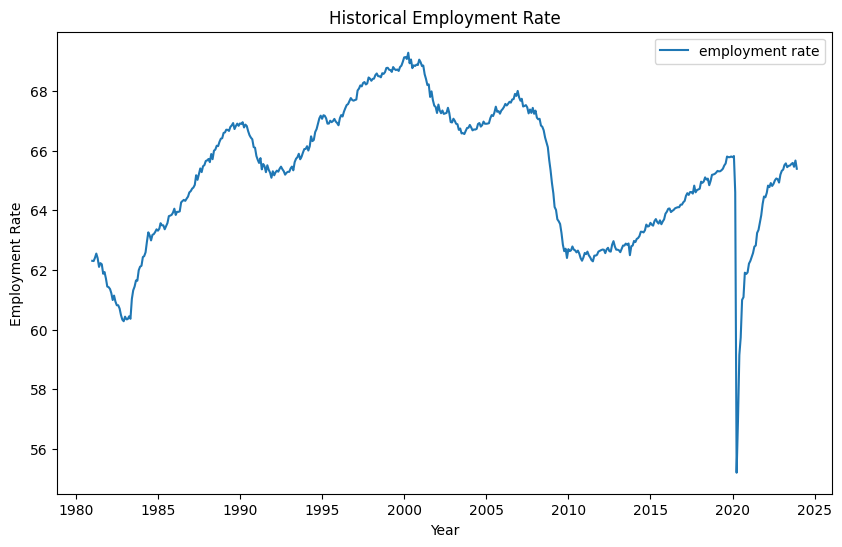

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(er_df['Date'], er_df['emp_rate'], label='employment rate')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.title('Historical Employment Rate')
plt.legend()
plt.show()

We observed a significant decline in 2020 due to the global coronavirus pandemic. As this was a major worldwide economic event impacting all sectors of the economy, we chose not to smooth the data to preserve the integrity of its impact in our analysis.

#### 2. AI patent Data

Checking for null values, duplicates and printing summary

In [14]:
# sorting the df
ai_df.sort_values(by='Date', inplace=True)

# Printing data type
print(f'\n Printing datatypes of each coloumn\n {ai_df.dtypes}')

# printing null values
print(f'\n Checking for null values \n {ai_df.isnull().sum()}')

# checking for duplicate
print(f'\n Checking for duplicates \n {ai_df.duplicated().value_counts()}')

#Printing summary statistics
print(f'\n \n Print summary statistics \n {ai_df.describe()}')


 Printing datatypes of each coloumn
 Date          datetime64[ns]
patent_cnt             int64
dtype: object

 Checking for null values 
 Date          0
patent_cnt    0
dtype: int64

 Checking for duplicates 
 False    226
Name: count, dtype: int64

 
 Print summary statistics 
                                 Date  patent_cnt
count                            226  226.000000
mean   2014-09-09 19:38:45.663716864  140.252212
min              2005-02-01 00:00:00    1.000000
25%              2010-01-08 18:00:00    7.250000
50%              2014-09-16 00:00:00   20.500000
75%              2019-05-24 06:00:00  316.750000
max              2024-02-01 00:00:00  616.000000
std                              NaN  183.654780


Ploting the data

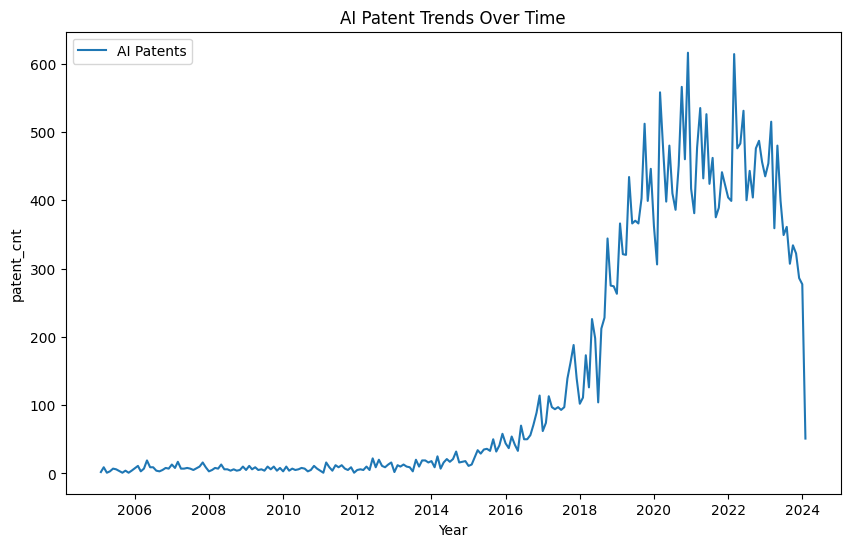

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(ai_df['Date'], ai_df['patent_cnt'], label='AI Patents')
plt.xlabel('Year')
plt.ylabel('patent_cnt')
plt.title('AI Patent Trends Over Time')
plt.legend()
plt.show()


#### 3. Consumer debt


Checking for null values, duplicates and printing summary

In [16]:
# sorting the df
debt_df.sort_values(by='Date', inplace=True)

# Printing data type
print(f'\n Printing datatypes of each coloumn\n {debt_df.dtypes}')

# printing null values
print(f'\n Checking for null values \n {debt_df.isnull().sum()}')

# checking for duplicate
print(f'\n Checking for duplicates \n {debt_df.duplicated().value_counts()}')

#Printing summary statistics
print(f'\n \n Print summary statistics \n {debt_df.describe()}')


 Printing datatypes of each coloumn
 Date    datetime64[ns]
debt           float64
dtype: object

 Checking for null values 
 Date    0
debt    0
dtype: int64

 Checking for duplicates 
 False    283
Name: count, dtype: int64

 
 Print summary statistics 
                                 Date        debt
count                            283  283.000000
mean   2012-04-15 22:38:35.194346240   81.953049
min              2000-07-01 00:00:00   20.724200
25%              2006-05-16 12:00:00   33.273200
50%              2012-04-01 00:00:00   74.594500
75%              2018-03-16 12:00:00  128.599350
max              2024-02-01 00:00:00  193.701500
std                              NaN   50.749524


Ploting the data

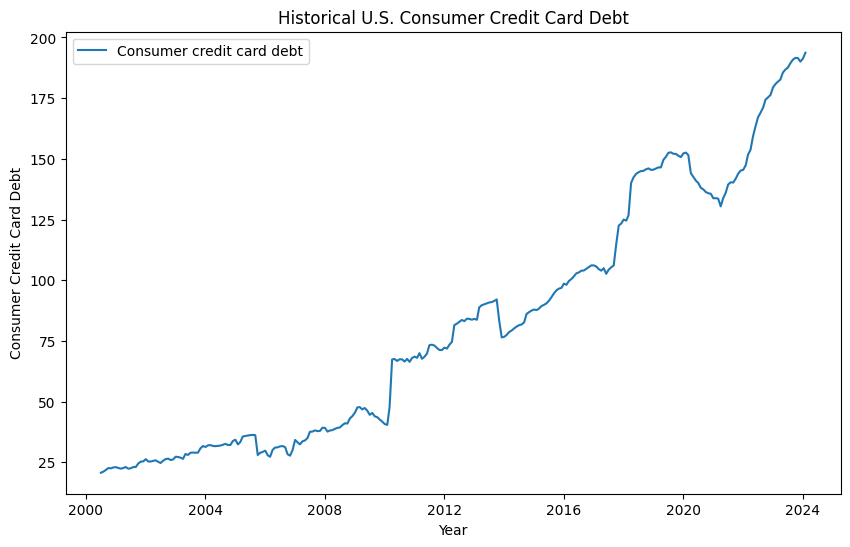

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(debt_df['Date'], debt_df['debt'], label='Consumer credit card debt')
plt.xlabel('Year')
plt.ylabel('Consumer Credit Card Debt')
plt.title('Historical U.S. Consumer Credit Card Debt')
plt.legend()
plt.show()

#### 4. Interest rate data


Checking for null values, duplicates and printing summary

In [18]:
# sorting the df
ir_df.sort_values(by='Date', inplace=True)

# Printing data type
print(f'\n Printing datatypes of each coloumn\n {ir_df.dtypes}')

# printing null values
print(f'\n Checking for null values \n {ir_df.isnull().sum()}')

# checking for duplicate
print(f'\n Checking for duplicates \n {ir_df.duplicated().value_counts()}')

#Printing summary statistics
print(f'\n \n Print summary statistics \n {ir_df.describe()}')


 Printing datatypes of each coloumn
 Date        datetime64[ns]
int_rate           float64
dtype: object

 Checking for null values 
 Date        0
int_rate    0
dtype: int64

 Checking for duplicates 
 False    837
Name: count, dtype: int64

 
 Print summary statistics 
                                 Date   int_rate
count                            837  837.00000
mean   1989-05-01 16:08:36.129032320    4.60417
min              1954-07-01 00:00:00    0.05000
25%              1971-12-01 00:00:00    1.81000
50%              1989-05-01 00:00:00    4.21000
75%              2006-10-01 00:00:00    6.24000
max              2024-03-01 00:00:00   19.10000
std                              NaN    3.58627


Ploting the data

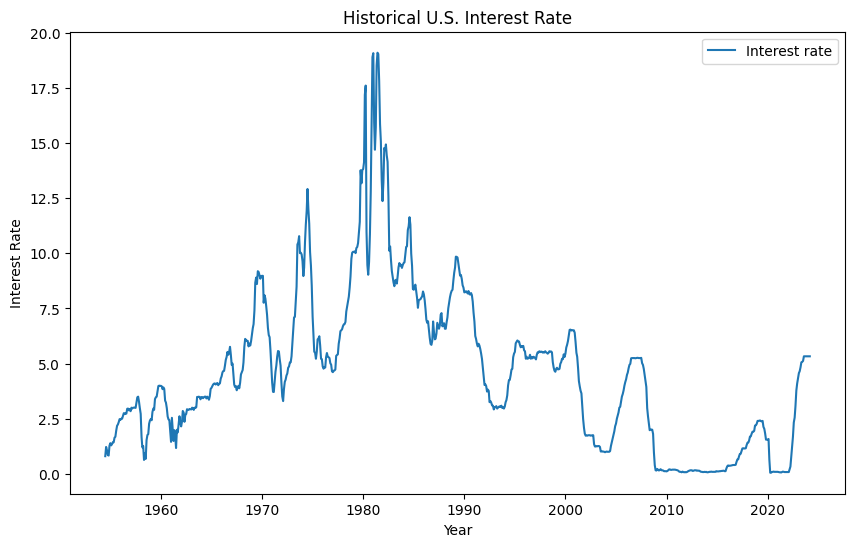

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(ir_df['Date'], ir_df['int_rate'], label='Interest rate')
plt.xlabel('Year')
plt.ylabel('Interest Rate')
plt.title('Historical U.S. Interest Rate')
plt.legend()
plt.show()



---



#### 5. PCE Data


Checking for null values, duplicates and printing summary

In [20]:
# sorting the df
pce_df.sort_values(by='Date', inplace=True)

# Printing data type
print(f'\n Printing datatypes of each coloumn\n {pce_df.dtypes}')

# printing null values
print(f'\n Checking for null values \n {pce_df.isnull().sum()}')

# checking for duplicate
print(f'\n Checking for duplicates \n {pce_df.duplicated().value_counts()}')

#Printing summary statistics
print(f'\n \n Print summary statistics \n {pce_df.describe()}')


 Printing datatypes of each coloumn
 Date         datetime64[ns]
inflation           float64
dtype: object

 Checking for null values 
 Date         0
inflation    0
dtype: int64

 Checking for duplicates 
 False    780
Name: count, dtype: int64

 
 Print summary statistics 
                                 Date   inflation
count                            780  780.000000
mean   1991-07-01 23:15:41.538461568   59.255682
min              1959-01-01 00:00:00   15.501000
25%              1975-03-24 06:00:00   26.537750
50%              1991-06-16 00:00:00   62.537000
75%              2007-10-08 18:00:00   86.618500
max              2024-01-01 00:00:00  120.808000
std                              NaN   31.322306


Ploting the data

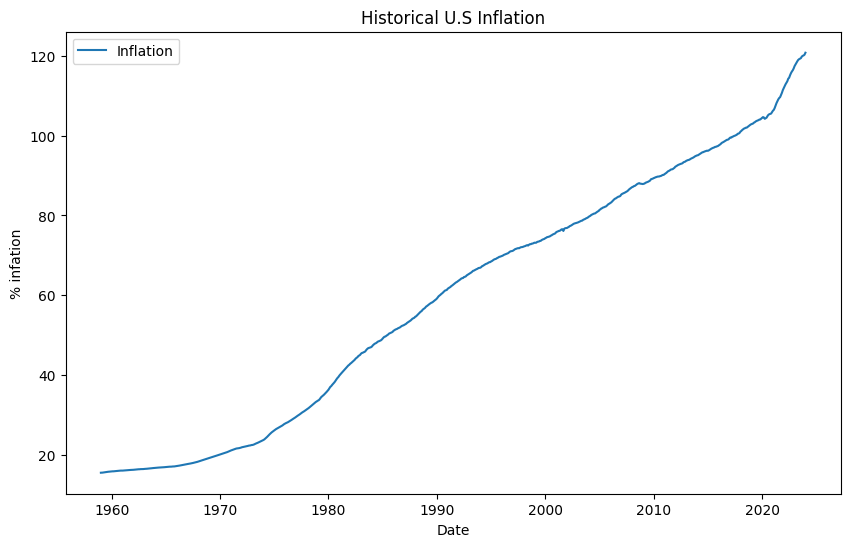

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(pce_df['Date'], pce_df['inflation'], label='Inflation')
plt.xlabel('Date')
plt.ylabel('% infation')
plt.title('Historical U.S Inflation')
plt.legend()
plt.show()

#### 6. Bussiness Applications Data


Checking for null values, duplicates and printing summary

In [36]:
# sorting the df
bsns_app_df.sort_values(by='Date', inplace=True)

# Printing data type
print(f'\n Printing datatypes of each coloumn\n {bsns_app_df.dtypes}')

# printing null values
print(f'\n Checking for null values \n {bsns_app_df.isnull().sum()}')

# checking for duplicate
print(f'\n Checking for duplicates \n {bsns_app_df.duplicated().value_counts()}')

#Printing summary statistics
print(f'\n \n Print summary statistics \n {bsns_app_df.describe()}')


 Printing datatypes of each coloumn
 Date             object
bsns_app_cnt    float64
dtype: object

 Checking for null values 
 Date            0
bsns_app_cnt    0
dtype: int64

 Checking for duplicates 
 False    220
Name: count, dtype: int64

 
 Print summary statistics 
         bsns_app_cnt
count     220.000000
mean   277392.636364
std    100710.184262
min    108970.000000
25%    209317.500000
50%    241460.000000
75%    311067.500000
max    618970.000000


Ploting the data

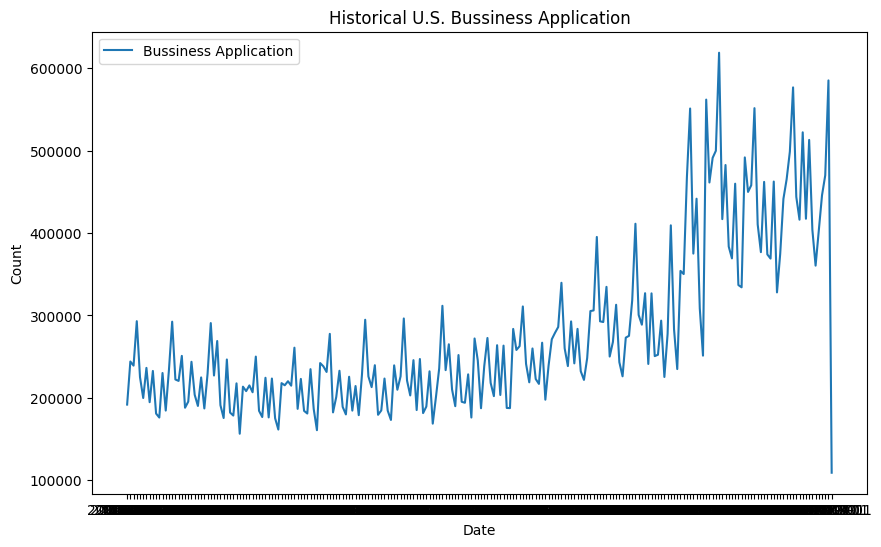

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(bsns_app_df['Date'], bsns_app_df["bsns_app_cnt"], label='Bussiness Application')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Historical U.S. Bussiness Application')
plt.legend()
plt.show()

#### 7. QQQ Data


In [38]:
# sorting the df
qqq_df.sort_values(by='Date', inplace=True)

# Printing data type
print(f'\n Printing datatypes of each coloumn\n {qqq_df.dtypes}')

# printing null values
print(f'\n Checking for null values \n {qqq_df.isnull().sum()}')

# checking for duplicate
print(f'\n Checking for duplicates \n {qqq_df.duplicated().value_counts()}')

#Printing summary statistics
print(f'\n \n Print summary statistics \n {qqq_df.describe()}')


 Printing datatypes of each coloumn
 Date          object
qqq_price    float64
dtype: object

 Checking for null values 
 Date         0
qqq_price    0
dtype: int64

 Checking for duplicates 
 False    232
Name: count, dtype: int64

 
 Print summary statistics 
         qqq_price
count  232.000000
mean   137.704784
std    112.458187
min     28.730000
25%     47.272500
50%     96.945000
75%    186.017500
max    441.610000


Ploting the data

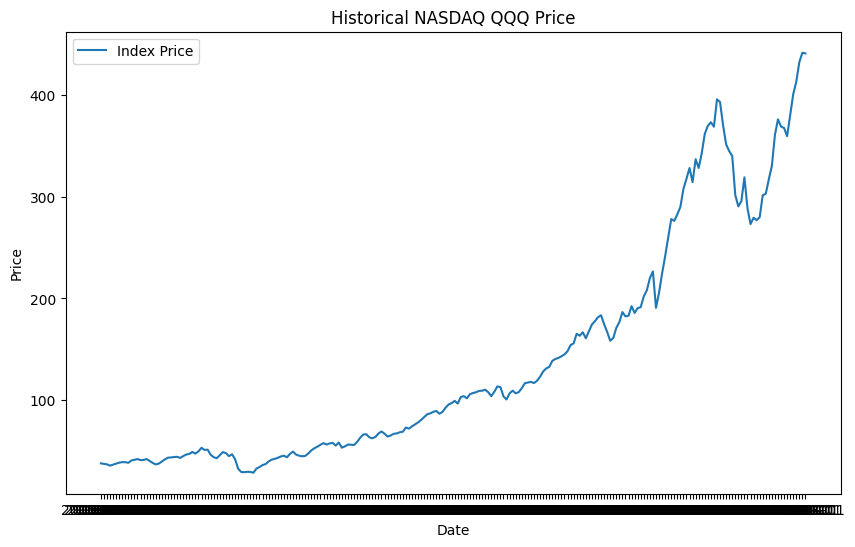

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(qqq_df['Date'], qqq_df["qqq_price"], label='Index Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical NASDAQ QQQ Price')
plt.legend()
plt.show()

#### 8. Home Price Index


In [40]:
# sorting the df
csu_df.sort_values(by='Date', inplace=True)

# Printing data type
print(f'\n Printing datatypes of each coloumn\n {csu_df.dtypes}')

# printing null values
print(f'\n Checking for null values \n {csu_df.isnull().sum()}')

# checking for duplicate
print(f'\n Checking for duplicates \n {csu_df.duplicated().value_counts()}')

#Printing summary statistics
print(f'\n \n Print summary statistics \n {csu_df.describe()}')


 Printing datatypes of each coloumn
 Date         object
hp_index    float64
dtype: object

 Checking for null values 
 Date        0
hp_index    0
dtype: int64

 Checking for duplicates 
 False    445
Name: count, dtype: int64

 
 Print summary statistics 
          hp_index
count  445.000000
mean   143.453652
std     63.041311
min     63.965000
25%     82.421000
50%    141.646000
75%    179.680000
max    315.363000


Ploting the data

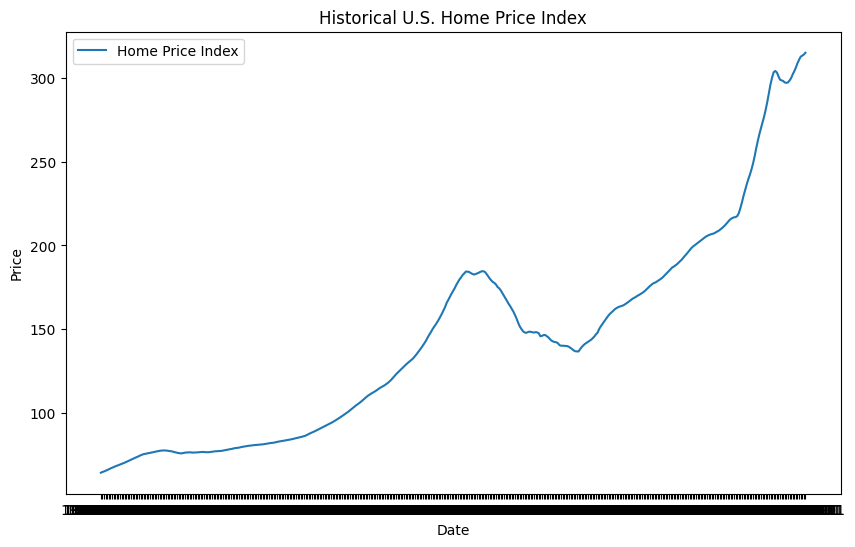

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(csu_df['Date'], csu_df["hp_index"], label='Home Price Index')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical U.S. Home Price Index')
plt.legend()
plt.show()

#### 9. Consumer Sentiment Index


In [42]:
# sorting the df
umc_df.sort_values(by='Date', inplace=True)

# Printing data type
print(f'\n Printing datatypes of each coloumn\n {umc_df.dtypes}')

# printing null values
print(f'\n Checking for null values \n {umc_df.isnull().sum()}')

# checking for duplicate
print(f'\n Checking for duplicates \n {umc_df.duplicated().value_counts()}')

#Printing summary statistics
print(f'\n \n Print summary statistics \n {umc_df.describe()}')


 Printing datatypes of each coloumn
 Date         datetime64[ns]
sentiment           float64
dtype: object

 Checking for null values 
 Date           0
sentiment    210
dtype: int64

 Checking for duplicates 
 False    856
Name: count, dtype: int64

 
 Print summary statistics 
                                 Date   sentiment
count                            856  646.000000
mean   1988-06-16 01:59:26.355140224   85.463932
min              1952-11-01 00:00:00   50.000000
25%              1970-08-24 06:00:00   76.000000
50%              1988-06-16 00:00:00   89.100000
75%              2006-04-08 12:00:00   94.875000
max              2024-02-01 00:00:00  112.000000
std                              NaN   12.916584


Ploting the data

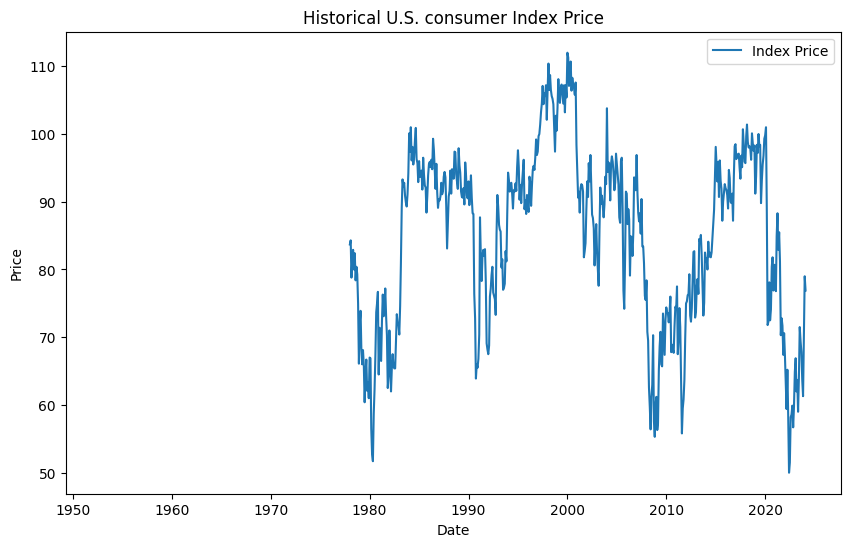

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(umc_df['Date'], umc_df["sentiment"], label='Index Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical U.S. consumer Index Price')
plt.legend()
plt.show()



---





---



# Conducting EDA

#### Merging all df using date to create a unified DataFrame.


Finding the minimum date coloumn to merge the datasets on the Date column to create a unified DataFrame. Handle missing values and ensure data integrity after merging.

In [44]:
# Convert all date columns to datetime format to ensure consistency
ai_df['Date'] = pd.to_datetime(ai_df['Date'])
er_df['Date'] = pd.to_datetime(er_df['Date'])
debt_df['Date'] = pd.to_datetime(debt_df['Date'])
ir_df['Date'] = pd.to_datetime(ir_df['Date'])
pce_df['Date'] = pd.to_datetime(pce_df['Date'])
bsns_app_df['Date'] = pd.to_datetime(bsns_app_df['Date'])
qqq_df['Date'] = pd.to_datetime(qqq_df['Date'])
csu_df['Date'] = pd.to_datetime(csu_df['Date'])
umc_df['Date'] = pd.to_datetime(umc_df['Date'])

# Calculate max and min dates for each dataset
max_ai_date = ai_df['Date'].max()
min_ai_date = ai_df['Date'].min()

max_er_date = er_df['Date'].max()
min_er_date = er_df['Date'].min()

max_debt_date = debt_df['Date'].max()
min_debt_date = debt_df['Date'].min()

max_ir_date = ir_df['Date'].max()
min_ir_date = ir_df['Date'].min()

max_pce_date = pce_df['Date'].max()
min_pce_date = pce_df['Date'].min()

max_bsns_app_date = bsns_app_df['Date'].max()
min_bsns_app_date = bsns_app_df['Date'].min()

max_qqq_date = qqq_df['Date'].max()
min_qqq_date = qqq_df['Date'].min()

max_csu_date = csu_df['Date'].max()
min_csu_date = csu_df['Date'].min()

max_umc_date = umc_df['Date'].max()
min_umc_date = umc_df['Date'].min()

# Find the overall maximum and minimum dates across all datasets
overall_max_date = min(max_ai_date, max_er_date, max_debt_date, max_ir_date, max_pce_date, max_bsns_app_date, max_qqq_date, max_csu_date, max_umc_date)
overall_min_date = max(min_ai_date, min_er_date, min_debt_date, min_ir_date, min_pce_date, min_bsns_app_date, min_qqq_date, min_csu_date, min_umc_date)

# Print overall max and min dates
print("Overall maximum date across all datasets:", overall_max_date)
print("Overall minimum date across all datasets:", overall_min_date)

Overall maximum date across all datasets: 2023-12-01 00:00:00
Overall minimum date across all datasets: 2006-01-01 00:00:00


In [45]:
# Define a function to merge datasets with date filtering
def merge_datasets(base_df, new_df, start_date, end_date):
    # Filter new_df based on date range
    filtered_df = new_df[(new_df['Date'] >= start_date) & (new_df['Date'] <= end_date)]
    # Merge with base_df
    return pd.merge(left=base_df, right=filtered_df, on='Date', how='inner')

# Start with the first dataset, filter it for the initial setup
base_df = er_df[(er_df['Date'] >= '2005-12-01') & (er_df['Date'] <= '2023-12-01')]

# List of other datasets to merge (assuming they all have a 'Date' column and a data column)
datasets = [
    (ai_df, 'patent_cnt'),
    (debt_df, 'debt'),
    (ir_df, 'int_rate'),
    (pce_df, 'inflation'),
    (bsns_app_df, 'bsns_app_cnt'),
    (qqq_df, 'qqq_price'),
    (csu_df,'hp_index'),
    (umc_df,'sentiment')
]

# Loop through each dataset in the list and merge
for df, _ in datasets:
    base_df = merge_datasets(base_df, df, '2005-12-01', '2023-12-01')

# Set 'Date' as the index
base_df.set_index('Date', inplace=True)

base_df = base_df.sort_values(by='Date')

# Display the first few rows of the final merged DataFrame
base_df.head()

,emp_rate,patent_cnt,debt,int_rate,inflation,bsns_app_cnt,qqq_price,hp_index,sentiment
Date,,,,,,,,,
2006-02-01,67.469414,11,27.8902,4.49,83.279,244020.0,41.12,183.287,86.7
2006-03-01,67.565305,3,27.2826,4.59,83.509,239020.0,41.30,184.364,88.9
2006-04-01,67.512750,7,30.1349,4.79,83.764,292990.0,42.16,184.328,87.4
2006-05-01,67.568680,19,31.0817,4.94,83.974,225050.0,40.26,184.155,79.1
2006-06-01,67.636095,9,31.1865,4.99,84.186,199710.0,38.35,183.506,84.9


Checking Data Intengrity

In [46]:
# Check for missing values in each column
print(base_df.isnull().sum())

# Check data types of each column
print(f'\ndata types\n{base_df.dtypes}\n')

# Check for duplicate rows
print("Number of duplicate rows:", base_df.duplicated().sum())


emp_rate        0
patent_cnt      0
debt            0
int_rate        0
inflation       0
bsns_app_cnt    0
qqq_price       0
hp_index        0
sentiment       0
dtype: int64

data types
emp_rate        float64
patent_cnt        int64
debt            float64
int_rate        float64
inflation       float64
bsns_app_cnt    float64
qqq_price       float64
hp_index        float64
sentiment       float64
dtype: object

Number of duplicate rows: 0


In [47]:
# Display summary statistics for the DataFrame
base_df.describe()

,emp_rate,patent_cnt,debt,int_rate,inflation,bsns_app_cnt,qqq_price,hp_index,sentiment
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,64.228415,147.051643,98.064622,1.384883,97.821798,276062.629108,138.984789,192.732235,80.043662
std,1.900931,186.186157,46.019333,1.801162,9.516273,97467.723403,107.134826,49.652829,13.132809
min,55.198115,1.000000,27.282600,0.050000,83.279000,156310.000000,28.730000,136.531000,50.000000
25%,62.782425,8.000000,67.404100,0.110000,89.855000,210030.000000,51.150000,154.201000,70.300000
50%,64.085416,25.000000,90.526000,0.220000,96.324000,241160.000000,103.740000,180.253000,80.700000
75%,65.341803,334.000000,140.342900,2.130000,103.706000,308580.000000,186.640000,209.254000,91.700000
max,68.001240,616.000000,191.577000,5.330000,120.308000,618970.000000,400.830000,314.243000,101.400000


#### Calculate Yearly Rate of Change
Calculating the yearly rate of change for each metrics to capture how the variables are changing year-over-year. This helps in identifying trends and eliminating seasonality effects.

In [50]:

# Calculate yearly rate of change for each numeric column
roc_df = base_df.pct_change(periods=12) * 100  # 12 months in a year

# Display the rate of change DataFrame
roc_df

,emp_rate,patent_cnt,debt,int_rate,inflation,bsns_app_cnt,qqq_price,hp_index,sentiment
Date,,,,,,,,,
2006-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-08-01,0.842140,-18.510158,12.066364,128.755365,3.726185,11.572391,15.641355,2.598385,19.243986
2023-09-01,0.801584,-24.009901,11.575133,109.019608,3.592483,39.048780,27.364373,3.986378,15.699659
2023-10-01,0.634938,-29.831933,9.864379,73.051948,3.394006,-12.673773,31.633475,4.742176,6.510851


In [51]:
# Fill or drop missing values
roc_df.dropna(inplace=True)

roc_df.head()

,emp_rate,patent_cnt,debt,int_rate,inflation,bsns_app_cnt,qqq_price,hp_index,sentiment
Date,,,,,,,,,
2007-02-01,0.301749,-27.272727,19.122846,17.149220,2.556467,-4.093927,7.952335,0.714726,5.305652
2007-03-01,0.253691,466.666667,18.789631,14.596950,2.376989,22.324492,4.769976,-0.116617,-0.562430
2007-04-01,-0.051475,0.000000,11.647625,9.603340,2.210974,-24.164647,6.925996,-0.715572,-0.343249
2007-05-01,-0.105154,-63.157895,9.407143,6.275304,2.075642,-2.048434,15.822156,-1.387418,11.630847
2007-06-01,-0.164458,-11.111111,12.219390,5.210421,1.987266,25.602123,23.285528,-1.772694,0.471143


#### Normalize the Data

To ensure all variables are equally treated and to avoid bias

In [58]:
from sklearn.preprocessing import MinMaxScaler

# Selecting columns to scale
columns_to_scale = roc_df.columns

# Create a MinMaxScaler object to scale data to the range [0, 1]
minmax_scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
roc_df[columns_to_scale] = minmax_scaler.fit_transform(roc_df[columns_to_scale])

# Assign the scaled data to final_df
final_df = roc_df

# Display the scaled data
final_df.head()


,emp_rate,patent_cnt,debt,int_rate,inflation,bsns_app_cnt,qqq_price,hp_index,sentiment
Date,,,,,,,,,
2007-02-01,0.547499,0.070480,0.410352,0.020153,0.390147,0.234456,0.473549,0.398769,0.572145
2007-03-01,0.545831,0.625468,0.406364,0.019706,0.353883,0.407384,0.444043,0.373833,0.500446
2007-04-01,0.535244,0.101124,0.320898,0.018832,0.320338,0.103078,0.464033,0.355867,0.503124
2007-05-01,0.533382,0.030160,0.294087,0.018249,0.292994,0.247845,0.546518,0.335715,0.649430
2007-06-01,0.531324,0.088639,0.327740,0.018062,0.275137,0.428838,0.615717,0.324158,0.513075


In [59]:
final_df.describe()

,emp_rate,patent_cnt,debt,int_rate,inflation,bsns_app_cnt,qqq_price,hp_index,sentiment
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.531728,0.161021,0.330525,0.054513,0.296461,0.304492,0.543884,0.477839,0.500315
std,0.102816,0.120940,0.182010,0.147406,0.239421,0.148433,0.187643,0.221397,0.182892
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.514737,0.090909,0.235177,0.009489,0.167552,0.234319,0.450820,0.312496,0.395032
50%,0.553228,0.126253,0.322194,0.019706,0.208202,0.288269,0.566682,0.512838,0.519748
75%,0.566209,0.209609,0.397779,0.032987,0.290132,0.344058,0.655219,0.562073,0.601106
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Standardization using standardscaler

In [62]:
from sklearn.preprocessing import StandardScaler

# Selecting columns to scale
columns_to_scale = roc_df.columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data
roc_df[columns_to_scale] = scaler.fit_transform(roc_df[columns_to_scale])


final_df = roc_df
# Display the standardized data
final_df.head()


,emp_rate,patent_cnt,debt,int_rate,inflation,bsns_app_cnt,qqq_price,hp_index,sentiment
Date,,,,,,,,,
2007-02-01,0.153774,-0.750515,0.439680,-0.233680,0.392280,-0.473013,-0.375772,-0.358033,0.393729
2007-03-01,0.137517,3.849888,0.417717,-0.236720,0.240434,0.694915,-0.533413,-0.470946,0.000719
2007-04-01,0.034284,-0.496505,-0.053024,-0.242667,0.099978,-1.360317,-0.426612,-0.552296,0.015398
2007-05-01,0.016125,-1.084739,-0.200697,-0.246631,-0.014518,-0.382584,0.014067,-0.643546,0.817353
2007-06-01,-0.003936,-0.599991,-0.015338,-0.247899,-0.089288,0.839815,0.383773,-0.695874,0.069942


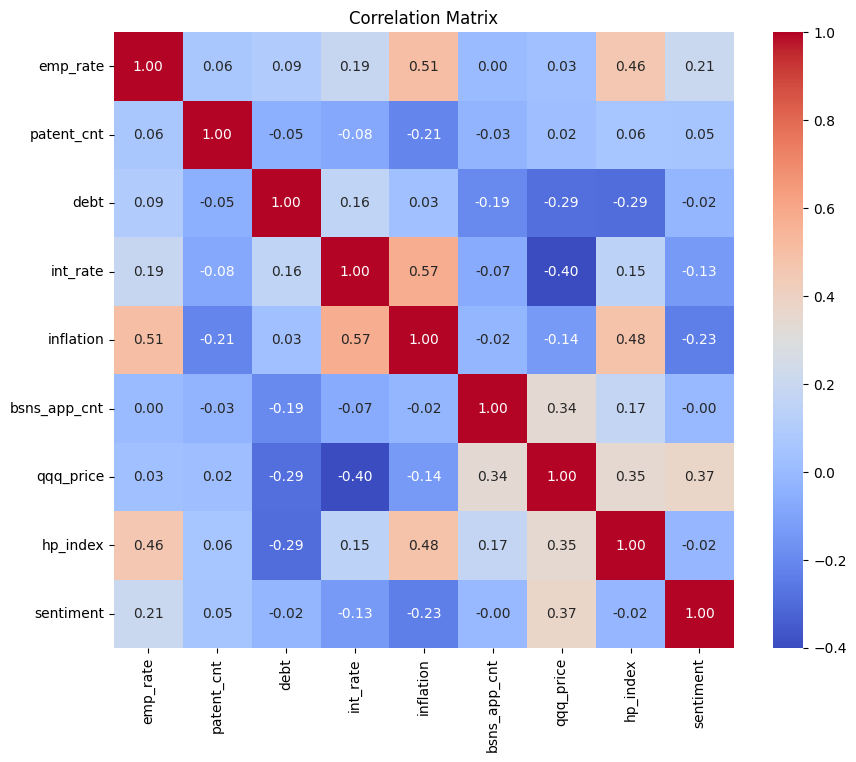

In [63]:
# prompt: code to generate correllation matrix fr final df

correlation_matrix = final_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix shows:

Employment rate moderately correlates with inflation and housing prices, indicating they may rise together.Consumer sentiment shows a mild positive link with employment rates and housing prices, potentially indicating that positive sentiment goes hand-in-hand with economic improvements. Business applications show little correlation with other economic indicators, suggesting independent dynamics.

## Regression Analysis

First fitting a bisic regression model with all the variables

In [67]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Assuming 'final_df' is your DataFrame and 'emp_rate' is the target variable
X = final_df.drop('emp_rate', axis=1)
y = final_df['emp_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adding a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)

# Fitting the regression model
model = sm.OLS(y_train, X_train_sm).fit()

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               emp_rate   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     18.85
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           1.99e-19
Time:                        00:37:28   Log-Likelihood:                -176.48
No. Observations:                 160   AIC:                             371.0
Df Residuals:                     151   BIC:                             398.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0071      0.060     -0.120      0.905      -0.125       0.111
patent_cnt       0.1419      0.058      2.427      0.016       0.026       0.257
debt             0.1849      0.064      2.887      0.004       0.058       0.312
int_rate        -0.2350      0.079     -2.959      0.004      -0.392      -0.078
inflation        0.5482      0.089      6.132      0.000       0.372       0.725
bsns_app_cnt     0.0937      0.065      1.443      0.151      -0.035       0.222
qqq_price       -0.2404      0.081     -2.979      0.003      -0.400      -0.081
hp_index         0.3947      0.082      4.808      0.000       0.233       0.557
sentiment        0.4210      0.072      5.849      0.000       0.279       0.563
==============================================================================
Omnibus:                       51.376   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              339.909
Skew:                          -0.941   Prob(JB):                     1.55e-74
Kurtosis:                       9.888   Cond. No.                         2.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
from sklearn.metrics import mean_squared_error

# Adding a constant to the test data
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_pred = model.predict(X_test_sm)

# Calculate the Mean Squared Error on the test set

mse_test = mean_squared_error(y_test, y_pred)

# Calculate the R-squared on the test set
r_squared_test = r2_score(y_test, y_pred)

print("Summary Statistics:")
print(f"Mean Squared Error (Test): {mse_test}")
print(f"Coefficient of Determination (R-squared - Test): {r_squared_test}")


Summary Statistics:
Mean Squared Error (Test): 0.40694718957464443
Coefficient of Determination (R-squared - Test): 0.45921931376650504


The OLS regression model with an R-squared of 0.500 suggests that half of the variability in employment rates is explained by the simple model with all the variables. Key predictors like inflation, consumer sentiment, and housing prices show significant positive correlations with employment rates, while interest rates have a negative effect. The model’s predictive power is consistent in both training and testing datasets, with an MSE of approximately 0.407 on the test set. Some signs of non-normality in residuals warrant further investigation, but there is no indication of serious autocorrelation issues. Overall, the model provides a substantial starting point for understanding the factors influencing employment rates.

Calculating VIF

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Initialize DataFrame to store VIF scores
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


        Feature       VIF
0    patent_cnt  1.104462
1          debt  1.187357
2      int_rate  1.854529
3     inflation  2.272974
4  bsns_app_cnt  1.184609
5     qqq_price  1.991551
6      hp_index  1.883098
7     sentiment  1.284420


Our analysis using the Variance Inflation Factor (VIF) confirms low multicollinearity among all predictors in our regression model. All VIF values are significantly below the threshold of 5, ensuring that each variable contributes uniquely and independently to explaining the employment rate


### Fitting New Model:

Looking at the p-values in the regression summary:

bsns_app_cnt has a p-value of 0.151, which is above the significant level of 0.05. This suggests that bsns_app_cnt might not be contributing significantly to the model, and its removal could potentially simplify the model without sacrificing predictive power.


In [71]:
# Drop 'bsns_app_cnt' from the predictors
X_new = X.drop('bsns_app_cnt', axis=1)

# Split the data again, this time without 'bsns_app_cnt'
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Add a constant to the new training set
X_train_new_sm = sm.add_constant(X_train_new)

# Fit the new model
model_new = sm.OLS(y_train, X_train_new_sm).fit()

# Print out the new statistics
print(model_new.summary())


                            OLS Regression Results                            
Dep. Variable:               emp_rate   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     21.09
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           1.12e-19
Time:                        00:38:27   Log-Likelihood:                -177.58
No. Observations:                 160   AIC:                             371.2
Df Residuals:                     152   BIC:                             395.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0053      0.060     -0.088      0.9

The removal of bsns_app_cnt did not substantially improve the model and resulted in a slight decrease in certain performance metrics. The changes in AIC and BIC are minimal, suggesting that while the model's complexity was reduced, the overall fit was not significantly improved.

###Check for Normality of Residuals

<Figure size 800x600 with 0 Axes>

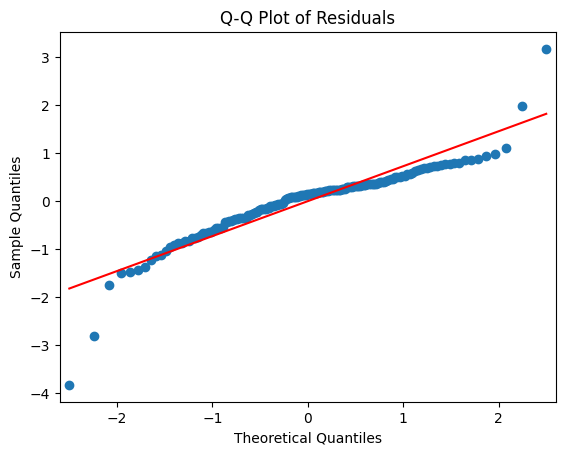

In [72]:
import statsmodels.api as sm

# Calculate residuals
residuals = y_train - model.predict(X_train_sm)


plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


The Q-Q plot reveals that the residuals deviate from the line at the tails. The left tail and the right tail show some points falling away from the reference line, indicating that the residuals have heavier tails than a normal distribution. This suggests that the normality assumption may be violated, especially in the tails.

### Residuals vs. Fitted Values

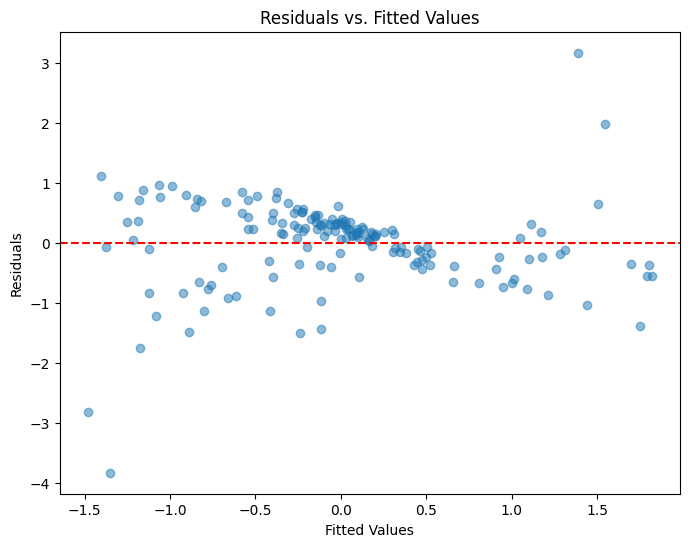

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate fitted values
fitted = model.predict(X_train_sm)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


The residuals are distributed fairly randomly around the horizontal line at zero, indicating good model fit without obvious signs of heteroscedasticity. However, there are a few points that stand out from the main cluster, indicating potential outliers or influential observations.

#### Conducting Yeo-Johnson Transformation

In [74]:
from scipy import stats

# Apply the Yeo-Johnson transformation
final_df['emp_rate_yeojohnson'], fitted_lambda = stats.yeojohnson(final_df['emp_rate'])

# Print out the lambda that was found to be best
print("Fitted Lambda for Yeo-Johnson transformation:", fitted_lambda)


Fitted Lambda for Yeo-Johnson transformation: 1.2212151944171243


### Fitting Model 2 with tranformed dependent variable

In [75]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Assuming 'final_df' is your DataFrame with the transformed 'emp_rate_yeojohnson' column
X = final_df.drop(['emp_rate', 'emp_rate_yeojohnson'], axis=1)  # Drop the original and the transformed target variable
y = final_df['emp_rate_yeojohnson']  # Use the transformed target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the new training set for the intercept
X_train_sm = sm.add_constant(X_train)

# Fit the OLS model using the Yeo-Johnson transformed target variable
model_yeojohnson = sm.OLS(y_train, X_train_sm).fit()

# Print out the summary of the model
model_summary = model_yeojohnson.summary()
print(model_summary)

                             OLS Regression Results                            
Dep. Variable:     emp_rate_yeojohnson   R-squared:                       0.521
Model:                             OLS   Adj. R-squared:                  0.495
Method:                  Least Squares   F-statistic:                     20.52
Date:                 Sun, 21 Apr 2024   Prob (F-statistic):           8.55e-21
Time:                         00:38:44   Log-Likelihood:                -170.12
No. Observations:                  160   AIC:                             358.2
Df Residuals:                      151   BIC:                             385.9
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0649      0.057    

<Figure size 800x600 with 0 Axes>

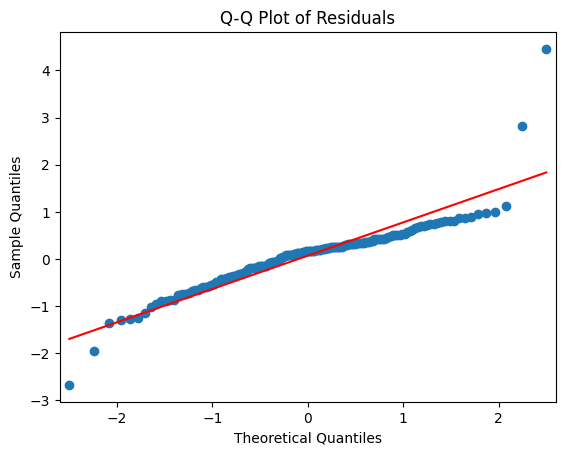

In [76]:
import statsmodels.api as sm
# Calculate residuals
residuals = y_train - model.predict(X_train_sm)

plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()